# Problem Statement:

* Goal is to create a model which will be able to predict all positive class as positive only.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('C://Users//pawar//Data science//Csv_files//Client.csv',index_col=0)

In [3]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,1,0.0,1.0,0.0,50.0,34.940
1,3,0,1.0,0.0,0.0,18.0,0.891
2,66,0,0.0,1.0,0.0,5.0,0.330
3,70,1,0.0,1.0,1.0,31.0,0.037
4,96,0,0.0,1.0,0.0,30.0,0.038


# EDA

In [4]:
#dropping the case number column as it is not required
df.drop(columns=["CASENUM"],inplace=True,axis=1)

In [5]:
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,1,0.0,1.0,0.0,50.0,34.940
1,0,1.0,0.0,0.0,18.0,0.891
2,0,0.0,1.0,0.0,5.0,0.330
3,1,0.0,1.0,1.0,31.0,0.037
4,0,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,0,0.0,1.0,0.0,NaN,0.576
1336,1,1.0,1.0,0.0,46.0,3.705
1337,0,1.0,1.0,0.0,39.0,0.099
1338,1,1.0,0.0,0.0,8.0,3.177


In [6]:
df.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.511194,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,1.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 73.3 KB


In [8]:
df.shape

(1340, 6)

In [9]:
df.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

## Missing Value imputation

In [10]:
from sklearn.impute import SimpleImputer # to replacs NA values of more than one columns of same category 
                                            # eg. for three ctegorical column  'CLMSEX', 'CLMINSUR', 'SEATBELT'

In [11]:
si = SimpleImputer(strategy='most_frequent')

In [12]:

df.iloc[:,1:4] = si.fit_transform(df.iloc[:,1:4]) # fit will perfom calculation like mode and median and transform will replace  NA values with mean or median

In [13]:
df['CLMAGE'].fillna(df['CLMAGE'].mean(), inplace=True)

In [14]:
df.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

## Splitting the data into training and testing set.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x = df.iloc[:,1:]
y = df['ATTORNEY']

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=42)

In [31]:
xtrain

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1148,1.0,1.0,0.0,7.000000,3.734
807,0.0,1.0,0.0,16.000000,111.405
1287,0.0,0.0,0.0,10.000000,0.040
590,1.0,1.0,0.0,6.000000,0.100
1188,1.0,1.0,0.0,44.000000,13.000
...,...,...,...,...,...
1095,0.0,1.0,0.0,47.000000,0.080
1130,1.0,1.0,0.0,30.000000,5.595
1294,1.0,1.0,0.0,28.414422,1.041
860,1.0,0.0,0.0,55.000000,1.769


## Model Building


In [34]:
from sklearn.linear_model import LogisticRegression


In [35]:
lg = LogisticRegression()


In [44]:
#Train the model
lg.fit(xtrain,ytrain)

#Prediction
ypred = lg.predict(xtest)
lg.coef_                   #  gives  m values for each columns

array([[-0.36400221, -0.33622227,  0.70544976, -0.00864279,  0.41179482]])

In [37]:
len(xtest)

268

In [38]:
len(ypred)

268

## Model Evaluation


In [39]:
print('Actual Y: ', ytest[:25].values)
print('Predict Y:', ypred[:25])

Actual Y:  [1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0]
Predict Y: [1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1]


In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       140
           1       0.76      0.66      0.71       128

    accuracy                           0.74       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.74      0.74      0.74       268



In [45]:
confusion_matrix(ytest,ypred)    # sequence ->  TN ,FP ,FN,TP

array([[113,  27],
       [ 43,  85]], dtype=int64)

In [55]:
((113+85)/(113+27+43+85))*100 # manually calculated Accuracy

73.88059701492537

Text(50.722222222222214, 0.5, 'Predicted Values')

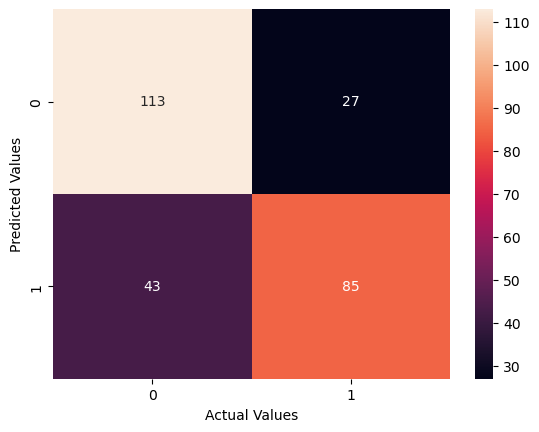

In [46]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True,fmt='g')  #OPTONAL CODE
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# converting Staight line to S-shapes curve

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x=np.arange(-10,10)
x

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

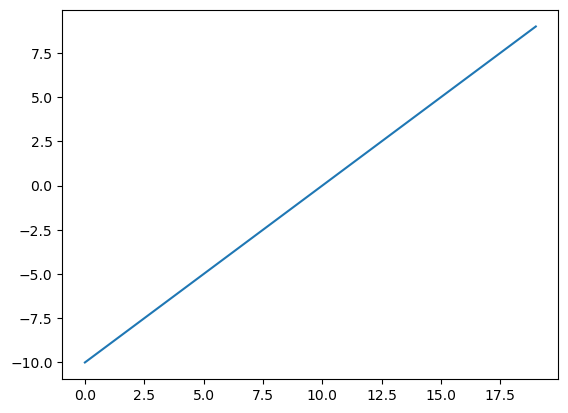

In [5]:
plt.plot(x)

In [9]:
y=1/(1+np.exp(-x))   #   formula for logistic regression y=1/(1+e^(-x))

y

array([4.53978687e-05, 1.23394576e-04, 3.35350130e-04, 9.11051194e-04,
       2.47262316e-03, 6.69285092e-03, 1.79862100e-02, 4.74258732e-02,
       1.19202922e-01, 2.68941421e-01, 5.00000000e-01, 7.31058579e-01,
       8.80797078e-01, 9.52574127e-01, 9.82013790e-01, 9.93307149e-01,
       9.97527377e-01, 9.99088949e-01, 9.99664650e-01, 9.99876605e-01])

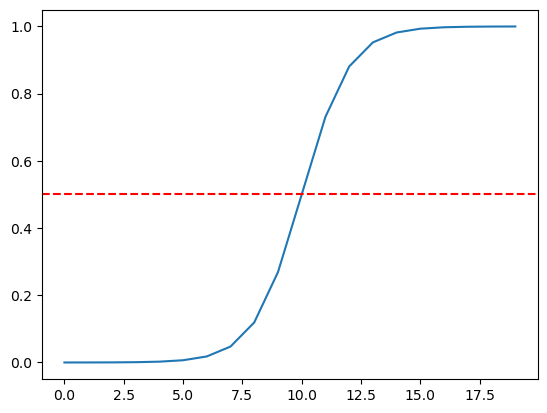

In [11]:
plt.plot(y)                                   # threshold values is 0.5  anything above 0.5 will be cosider positive class
plt.axhline(y=0.5,linestyle='--',color='red') # anything below 0.5 will be cosider  negitive class      

In [31]:
df.columns

Index(['ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT', 'CLMAGE', 'LOSS'], dtype='object')